In [1]:
from GDA_multiclass import GaussianDiscrimativeAnalysis_Multiclasses
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

iris_data = load_iris()
x_train, x_val, y_train, y_val = train_test_split(iris_data.data, iris_data.target)
GDA_model = GaussianDiscrimativeAnalysis_Multiclasses(x_train, y_train)
#print(y_train)
mu, var, phi = GDA_model.GenerativeModel()
#print(var)
y_pred = GDA_model.prediction(x_val)
score = f1_score(y_val, y_pred, average="weighted")
print(f'f1 score of our model {score:.8f}')


f1 score of our model 0.94797571


## plot in 2D (reduce dim by PCA)

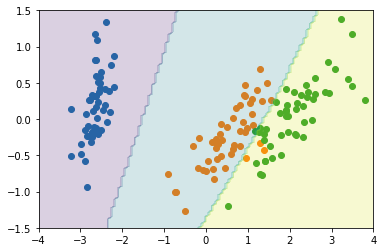

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
x, y = iris_data.data, iris_data.target
pca_model = PCA(n_components=2)
x_pca = pca_model.fit_transform(x)
# print(x_pca.shape)
GDA_pca = GaussianDiscrimativeAnalysis_Multiclasses(x_pca, y)
mu_pca, var_pca, phi_pca = GDA_pca.GenerativeModel()

# prepare separate x_pca ponits for ploting
x_pca_dic = GDA_pca.SeparateXpoints()
C = len(x_pca_dic)



import numpy as np
# print(x_pca.shape,np.max(x_pca[:,0]), np.min(x_pca[:,0]))
resolution = 100
x0 = np.linspace(-4, 4, resolution)
x1 = np.linspace(-1.5, 1.5, resolution)


x0_grid, x1_grid = np.meshgrid(x0, x1)
# print(x0_grid.shape)
x_hat = np.c_[x0_grid.ravel(), x1_grid.ravel()]
# print(x_hat.shape)
y_line = GDA_pca.prediction(x_hat)
z = y_line.reshape(resolution, resolution)
for i in range(C):
    plt.scatter(x_pca_dic[i][:, 0], x_pca_dic[i][:, 1])
plt.contourf(x0_grid, x1_grid, z, alpha=0.2)